In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
plt.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "axes.titlesize": 16, 
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12
})

In [3]:
ngb_df = pd.read_csv("tables_for_analysis/NGBooster_result.csv")
ngb_df["pred_e"] = ngb_df["pred_e"] + ngb_df["e"]
ngb_df["pred_sini"] = ngb_df["pred_inc"] + np.sin(ngb_df['Incl.']*np.pi/180)

In [4]:
merged_df = pd.read_csv("merged_elements.csv")
merged_df_copy = merged_df
test_name_list = ngb_df["Des'n"].to_list()

ngb_subset = ngb_df[["Des'n", "pred_e", "error_e", "pred_inc", "error_inc", "pred_sini"]]
merged_df = pd.merge(merged_df, ngb_subset, on="Des'n", how="inner")

/tmp/ipykernel_589004/3248726607.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("merged_elements.csv")


In [5]:
merged_df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Des'n,H_x,G,Epoch,M,...,ecospo,esinpo,sinicosO,sinisinO,s0,pred_e,error_e,pred_inc,error_inc,pred_sini
0,81922,81922,81922,81922,81922,83786,14.71,0.15,K239D,6.11009,...,0.057368,0.068713,0.000419,0.001608,-0.000062,0.107020,0.002256,-0.020499,0.000809,0.178178
1,81924,81924,81924,81924,81924,83788,14.54,0.15,K239D,341.92348,...,0.096904,0.076318,-0.001325,0.002040,-0.000066,0.121931,0.001482,-0.013094,0.000844,0.275033
2,81925,81925,81925,81925,81925,83789,15.02,0.15,K239D,243.54101,...,-0.016116,0.089694,0.000461,0.001448,-0.000071,0.076817,0.001725,-0.018507,0.001390,0.164149
3,81926,81926,81926,81926,81926,83790,14.10,0.15,K239D,43.63234,...,-0.021765,-0.054244,0.003235,-0.000312,-0.000077,0.045238,0.000831,0.004282,0.001087,0.366716
4,81929,81929,81929,81929,81929,83793,14.94,0.15,K239D,302.74612,...,-0.076762,0.057763,-0.000346,-0.001163,-0.000059,0.089521,0.003039,0.020054,0.000949,0.150657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467007,1248812,1248812,1248812,1248812,1248812,K23V04L,20.80,0.15,K239D,303.57151,...,0.018616,0.218257,-0.002896,-0.003396,-0.000016,0.216734,0.000693,-0.012990,0.000617,0.455128
467008,1248813,1248813,1248813,1248813,1248813,K23V04M,22.42,0.15,K239D,335.98695,...,0.138873,0.347637,-0.000227,-0.001267,-0.000028,0.404426,0.000931,0.005872,0.001424,0.168553
467009,1248814,1248814,1248814,1248814,1248814,K23V04N,20.48,0.15,K239D,33.05366,...,0.275485,-0.229990,0.000798,-0.001310,-0.000021,0.534411,0.000253,0.152189,0.000340,0.295233
467010,1248820,1248820,1248820,1248820,1248820,K23V07F,18.79,0.15,K239D,355.50487,...,0.127940,0.067062,0.001049,0.000653,-0.000038,0.160981,0.002743,-0.012910,0.000820,0.131019


In [6]:
percent_plot = []
purity_plot = []

In [7]:
propa = merged_df["propa"]
prope = merged_df["prope"]
propsini = merged_df["propsini"]

In [8]:
column_names = ['propa', 'prope', 'propsini', 'g', 's', 'H', 'NumOpps', 'PackedName', 'UnpackedName']
df_Hertha = pd.read_csv("family_tables/inner_135_hertha_fam3.csv", header=None, names=column_names)
df_Velleda = pd.read_csv("family_tables/inner_126_velleda_fam3.csv", header=None, names=column_names)
df_Moore_Sitterly = pd.read_csv("family_tables/inner_2110_moore_sitterly_fam3.csv", header=None, names=column_names)
df_Asia = pd.read_csv("family_tables/inner_67_asia_fam3.csv", header=None, names=column_names)
df_Bellona = pd.read_csv("family_tables/middle_28_bellona_fam3.csv", header=None, names=column_names)
df_Europa = pd.read_csv("family_tables/outer_52_europa_fam3.csv", header=None, names=column_names)
df_1990oe5 = pd.read_csv("family_tables/middle_16472_1990oe5_fam3.csv", header=None, names=column_names)
df_florentina = pd.read_csv("family_tables/pristine_321_florentina_fam3.csv", header=None, names=column_names)
def convert_id(val):
	val_str = str(val)
	if val_str.isdigit():
		return int(val_str)
	return val_str
df_Hertha["PackedName"] = df_Hertha["PackedName"].apply(convert_id)
df_Hertha

df_Velleda["PackedName"] = df_Velleda["PackedName"].apply(convert_id)
df_Velleda

df_Moore_Sitterly["PackedName"] = df_Moore_Sitterly["PackedName"].apply(convert_id)

df_Asia["PackedName"] = df_Asia["PackedName"].apply(convert_id)

df_Bellona["PackedName"] = df_Bellona["PackedName"].apply(convert_id)

df_Europa["PackedName"] = df_Europa["PackedName"].apply(convert_id)
df_1990oe5["PackedName"] = df_Europa["PackedName"].apply(convert_id)
df_florentina["PackedName"] = df_Europa["PackedName"].apply(convert_id)

In [9]:
des = 135
target = merged_df_copy[merged_df_copy["Des'n"] == des].iloc[0]
target

Unnamed: 0.4          134
Unnamed: 0.3          134
Unnamed: 0.2          134
Unnamed: 0.1          134
Unnamed: 0            134
Des'n                 135
H_x                  8.39
G                    0.15
Epoch               K239D
M                34.51442
Peri.           340.44092
Node            343.55574
Incl.             2.30318
e                0.207201
n                0.260403
a                2.428693
propa            2.428506
da               0.000001
prope            0.174326
de               0.000035
propsini         0.046521
dsini            0.000012
g               41.708511
s              -46.712515
H_y                  8.39
NumOpps                72
prope_h          0.174685
propsini_h       0.018515
g0               0.000032
ecospo           0.141317
esinpo          -0.102685
sinicosO          0.00031
sinisinO        -0.000091
s0              -0.000032
Name: 134, dtype: object

In [10]:
name_list = df_Hertha["PackedName"]
family_df = merged_df_copy[merged_df_copy["Des'n"].isin(name_list)]
family_pred_df = ngb_df[ngb_df["Des'n"].isin(name_list)]
name_list

0           135
1         i2990
2       K12Y27W
3         62799
4         37719
         ...   
1468      o2233
1469      N3654
1470    K15PB8G
1471      Y8235
1472      Y1046
Name: PackedName, Length: 1473, dtype: object

In [11]:
# Calculate the percentage of machine learning prediction still classifies asteroids into the family
family_pred_df = ngb_df[ngb_df["Des'n"].isin(name_list)]

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

In [18]:
# create a slab enclosing all family members
def slab_d_calc(family_df_copy, family_pred_df_copy, merged_df, command):
	if command == "osculating":
		columns_bound = {"a": "a", "e": "e", "sini": "Incl."}
		columns = {"a": "a", "e": "e", "sini": "Incl."}
	elif command == "proper":
		columns_bound = {"a": "propa", "e": "prope", "sini": "propsini"}
		columns = {"a": "propa", "e": "prope", "sini": "propsini"}
	elif command == "pred":
		# family_df_copy = family_pred_df_copy
		columns_bound = {"a": "propa", "e": "prope", "sini": "propsini"}
		columns = {"a": "propa", "e": "pred_e", "sini": "pred_sini"}

	adds = 0

	a_adds = (family_df_copy[columns_bound["a"]].max() - family_df_copy[columns_bound["a"]].min())/2
	e_adds = (family_df_copy[columns_bound["e"]].max() - family_df_copy[columns_bound["e"]].min())/2
	sini_adds = (family_df_copy[columns_bound["sini"]].max() - family_df_copy[columns_bound["sini"]].min())/2

	a_adds = 0
	e_adds = 0
	sini_adds = 0

	a_min, a_max = family_df_copy[columns_bound["a"]].min() - a_adds, family_df_copy[columns_bound["a"]].max() + a_adds
	e_min, e_max = family_df_copy[columns_bound["e"]].min() - e_adds, family_df_copy[columns_bound["e"]].max() + e_adds
	sini_min, sini_max = family_df_copy[columns_bound["sini"]].min() - sini_adds, family_df_copy[columns_bound["sini"]].max() + sini_adds

	slab_df = merged_df[
		(merged_df[columns["a"]] >= a_min) & (merged_df[columns["a"]] <= a_max) &
		(merged_df[columns["e"]] >= e_min) & (merged_df[columns["e"]] <= e_max) &
		(merged_df[columns["sini"]] >= sini_min) & (merged_df[columns["sini"]] <= sini_max)
	]

	a_family, e_family, sini_family, names = family_df_copy[columns_bound["a"]].values, family_df_copy[columns_bound["e"]].values, family_df_copy[columns_bound["sini"]].values, family_df_copy["Des'n"].values
	
	d_results = []
	for idx, row in slab_df.iterrows():
		a = row[columns["a"]]
		e = row[columns["e"]]
		sini = row[columns["sini"]]
		name = row["Des'n"]
		
		for a_f, e_f, sini_f, name_f in zip(a_family, e_family, sini_family, names):
			if name == name_f:
				continue
			else:
				da = a_f - a
				de = e_f - e
				dsini = sini_f - sini
				d = calculate_d(a, da, de, dsini)
				d_results.append({
					"name_asteroid": name,
					"name_family_asteroid": name_f,
					"d": d
				})
	d_df = pd.DataFrame(d_results)

	return d_df

d_df = slab_d_calc(family_df, family_pred_df, merged_df, "pred")
# d_df_osc = slab_d_calc(family_df, family_pred_df, merged_df, "osculating")

In [35]:
len(merged_df[merged_df["Des'n"].isin(name_list)])

70

In [36]:
# Number of family members included in ths slab
d_df_single = d_df.drop_duplicates(subset = ["name_asteroid"])
num_family_slab = len(d_df_single[d_df_single["name_asteroid"].isin(name_list)])
len(d_df_single)

138

In [40]:
filtered_df = d_df[d_df["d"] < 0]
filtered_df

,name_asteroid,name_family_asteroid,d


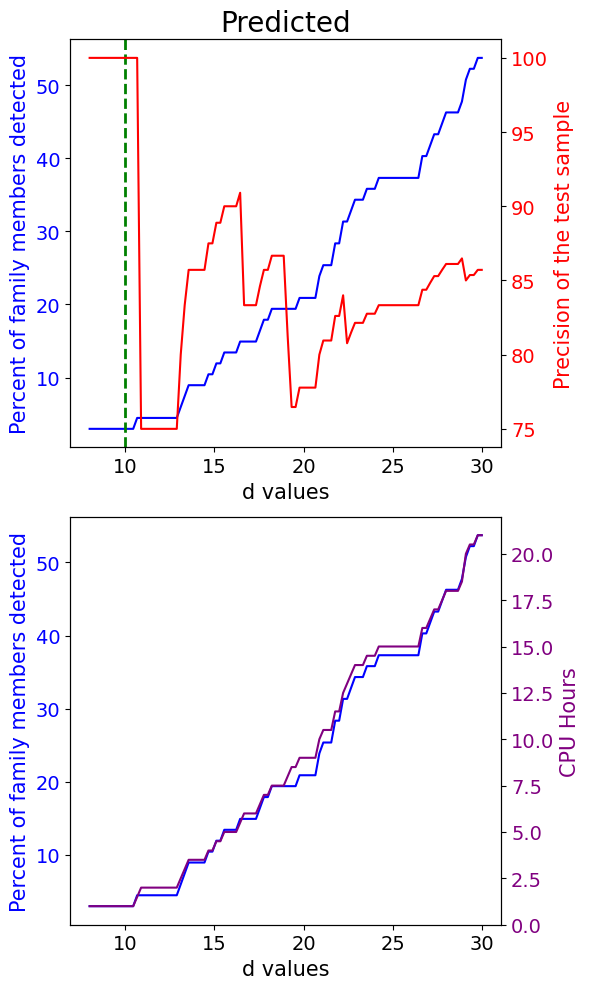

In [45]:
d_values = np.linspace(8, 30, 100)
percent_detected = []
cpu_hours = []
purity = []
d_published = 10

for d in d_values:
	filtered_df = d_df[d_df["d"] < d]
	filtered_df = filtered_df.drop_duplicates(subset = ["name_asteroid"])
	family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
	cpu_hours.append(len(filtered_df) * 0.5)
	percent_detected.append(len(family_slab_df)/num_family_slab * 100)
	purity.append((len(family_slab_df)/(len(filtered_df))) * 100)

# percent_detected = np.array(percent_detected)
# stop_idx = np.argmax(percent_detected >= 100) + 1

# # Slice all arrays up to stop_idx
# d_values = d_values[:stop_idx]
# percent_detected = percent_detected[:stop_idx]
# cpu_hours = cpu_hours[:stop_idx]
# purity = purity[:stop_idx]

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(6, 10))

ax1.plot(d_values, percent_detected, color='blue', label='Percent Detected')
ax1.set_xlabel('d values', size=15)
ax1.set_ylabel('Percent of family members detected', color='blue', size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax1.axvline(x=d_published, color='green', linestyle='--', linewidth=2)
ax1.set_title("Predicted", size = 20)

ax2 = ax1.twinx()
ax2.plot(d_values, purity, color='red', label='Purity')
ax2.set_ylabel('Precision of the test sample', color='red', size=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

ax3.plot(d_values, percent_detected, color='blue', label='Percent Detected')
ax3.set_xlabel('d values', size=15)
ax3.set_ylabel('Percent of family members detected', color='blue', size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelcolor='blue', labelsize=14)

ax4 = ax3.twinx()
ax4.plot(d_values, cpu_hours, color='purple', label='CPU Hours')
ax4.set_ylabel('CPU Hours', color='purple', size=15)
ax4.tick_params(axis='y', labelcolor='purple', labelsize=14)

fig.tight_layout()
plt.show()

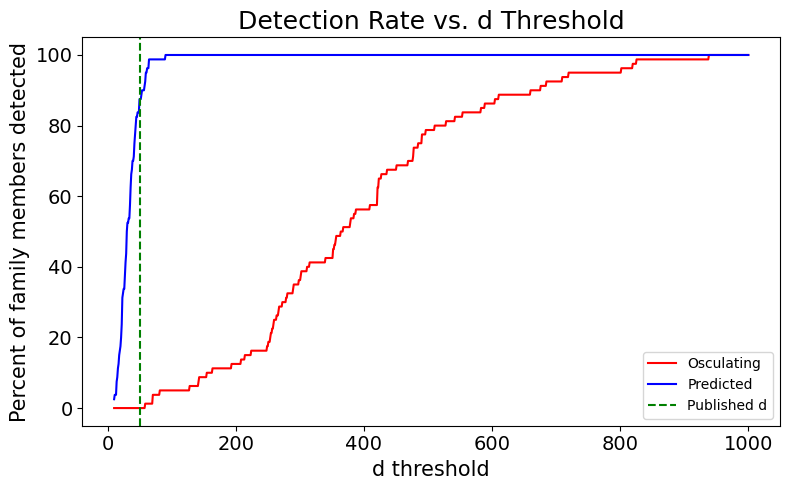

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d_values = np.linspace(10, 1000, 1000)

# Initialize dictionaries to hold detection percentages
percent_detected_by_source = {
	"Osculating": [],
	"Predicted": []
}

# Loop over both dataframes
for label, d_df in zip(["Osculating", "Predicted"], [d_df_osc, d_df_pred]):
	for d in d_values:
		filtered_df = d_df[d_df["d"] < d]
		filtered_df = filtered_df.drop_duplicates(subset=["name_asteroid"])
		family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
		percent = len(family_slab_df) / num_family_slab * 100
		percent_detected_by_source[label].append(percent)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(d_values, percent_detected_by_source["Osculating"], label="Osculating", color="red")
plt.plot(d_values, percent_detected_by_source["Predicted"], label="Predicted", color="blue")
plt.axvline(d_published, color="green", linestyle="--", label="Published d")

plt.xlabel("d threshold", fontsize=15)
plt.ylabel("Percent of family members detected", fontsize=15)
plt.title("Detection Rate vs. d Threshold", fontsize=18)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend()
plt.tight_layout()
plt.show()


In [72]:
d = 50
filtered_df = d_df[d_df["d"] < d]
filtered_df = filtered_df.drop_duplicates(subset = ["name_asteroid"])
family_slab_df = filtered_df[filtered_df["name_asteroid"].isin(name_list)]
print(f"Percentage of family members detected: {len(family_slab_df)/num_family_slab * 100}")
print(f"Purity of the sample: {len(family_slab_df)/(len(filtered_df)) * 100}")

Percentage of family members detected: 87.5
Purity of the sample: 84.33734939759037


In [73]:
percent_plot.append(len(family_slab_df)/num_family_slab * 100)
purity_plot.append(len(family_slab_df)/(len(filtered_df)) * 100)
percent_plot

[81.81818181818183,
 84.44444444444444,
 85.04273504273505,
 88.31521739130434,
 87.5]

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

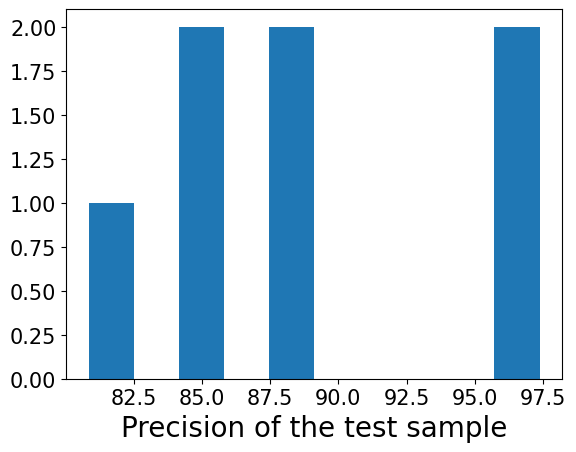

In [116]:
plt.hist(purity_plot)
plt.xlabel("Precision of the test sample", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

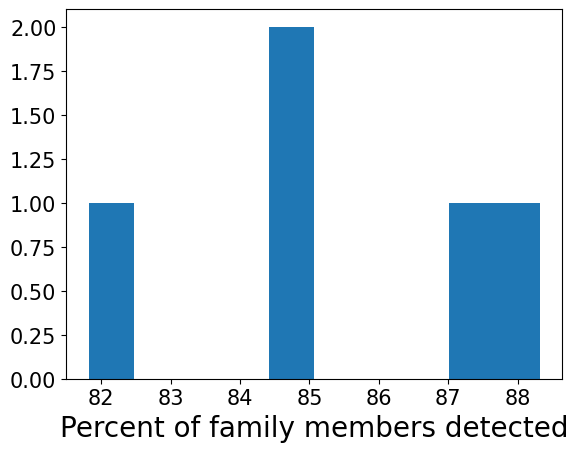

In [118]:
plt.hist(percent_plot)
plt.xlabel("Percent of family members detected", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [27]:
filtered_df = d_df[d_df["d"] < 70]
filtered_df[~filtered_df["name_asteroid"].isin(name_list)][["name_asteroid", "name_family_asteroid", "d"]]

,name_asteroid,name_family_asteroid,d
383,85279,R0153,46.283650
494,85279,K06DD5V,57.002101
504,85279,K08SY1Z,58.525075
546,85279,K15MG8O,59.859625
971,92644,M5764,69.054118
1052,92644,m0470,68.060023
1318,94567,b6150,67.706933
1325,94567,e0563,67.043726
1344,94567,j6792,47.611452
1361,94567,q4024,46.862546


In [ ]:
plt.hist(family_slab_df["d"])

(array([ 2.,  2.,  3.,  9.,  7.,  7., 10., 16.,  9., 11.]),
 array([16.58876152, 21.92359604, 27.25843056, 32.59326508, 37.9280996 ,
        43.26293412, 48.59776864, 53.93260316, 59.26743768, 64.6022722 ,
        69.93710672]),
 <BarContainer object of 10 artists>)

In [34]:
filtered["prope"]

Series([], Name: prope, dtype: float64)

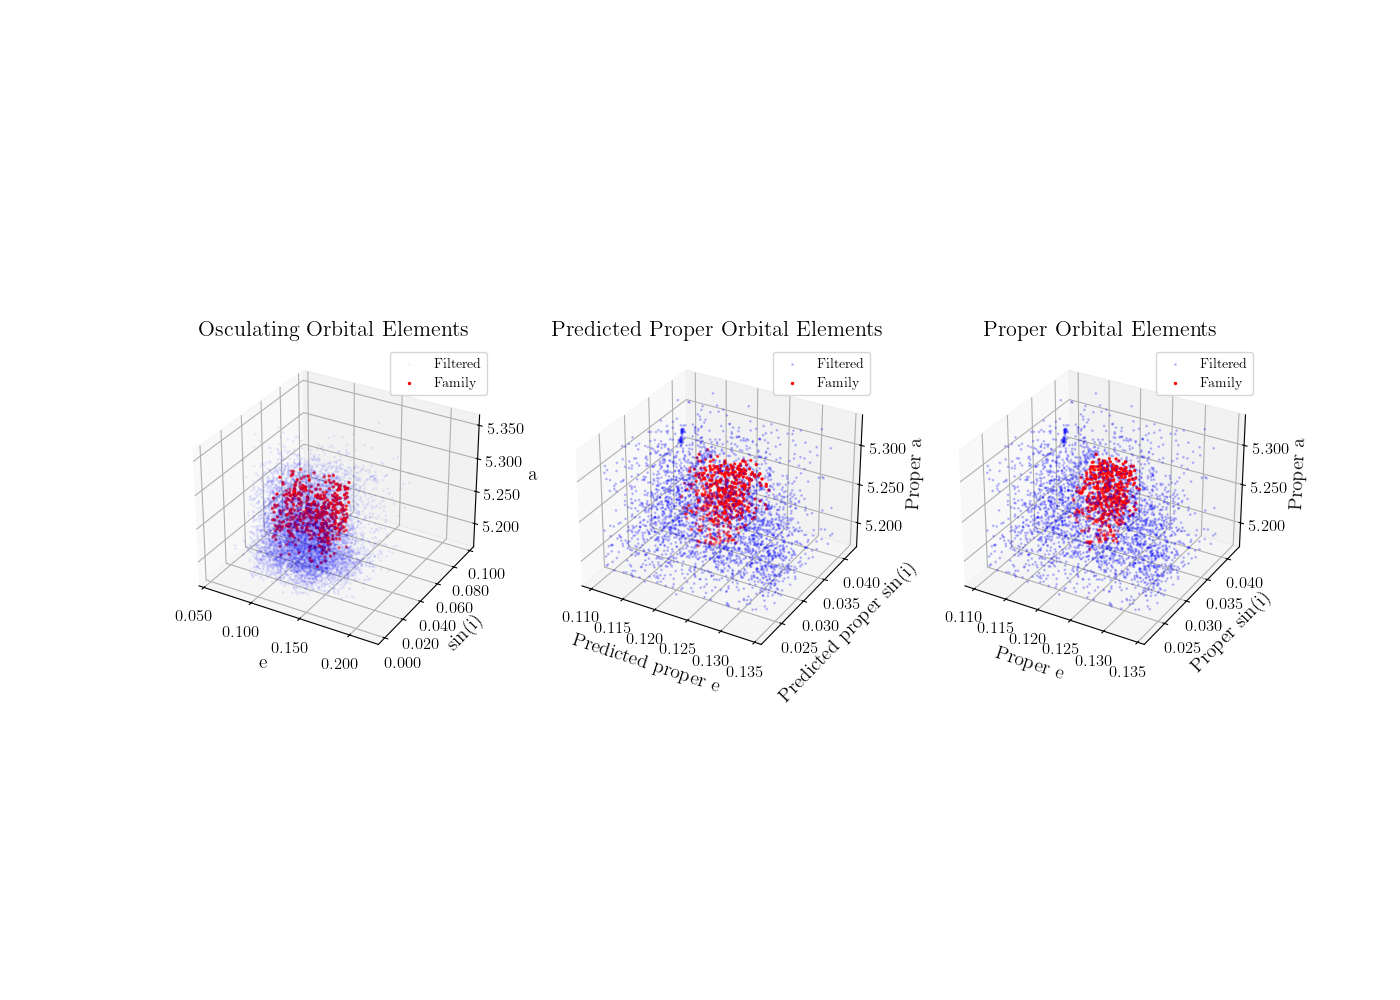

In [ ]:
%matplotlib widget
from matplotlib.ticker import FormatStrFormatter

formatter = FormatStrFormatter('%.3f')
family_test_df = family_df[family_df["Des'n"].isin(test_name_list)]
threshold_e = 0.01
threshold_i = 0.01
threshold_a = 0.01
filter = (propa < np.max(family_test_df["propa"]) + threshold_a) & (propa > np.min(family_test_df["propa"]) - threshold_a) &\
 (prope < np.max(family_test_df["prope"]) + threshold_e) & (prope > np.min(family_test_df["prope"])- threshold_e) &\
 (propsini < np.max(family_test_df["propsini"]) + threshold_i) & (propsini > np.min(family_test_df["propsini"])- threshold_i)
filtered = merged_df[filter]
filtered = filtered[(filtered["Des'n"].isin(test_name_list)) & (~filtered["Des'n"].isin(name_list))]
fig = plt.figure(figsize=(14, 10))

threshold_e = 0.01
threshold_i = 0.01
threshold_a = 0.01
filter_osc = (propa < np.max(family_test_df["a"]) + threshold_a) & (propa > np.min(family_test_df["a"]) - threshold_a) &\
 (prope < np.max(family_test_df["e"]) + threshold_e) & (prope > np.min(family_test_df["e"])- threshold_e) &\
 (propsini < np.max(np.sin(family_test_df["Incl."] * np.pi/180)) + threshold_i) & (propsini > np.min(np.sin(family_test_df["Incl."] * np.pi/180)) - threshold_i)
filtered_osc = merged_df[filter_osc]
filtered_osc = filtered_osc[(filtered_osc["Des'n"].isin(test_name_list)) & (~filtered_osc["Des'n"].isin(name_list))]

ax2 = fig.add_subplot(1, 3, 1, projection='3d')
ax2.scatter(filtered_osc["e"] / np.sqrt(2), np.sin(filtered_osc["Incl."]*np.pi/180) / np.sqrt(2), filtered_osc["a"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.05, label="Filtered")
ax2.scatter(family_test_df["e"] / np.sqrt(2), np.sin(family_test_df["Incl."] * np.pi/180) / np.sqrt(2), family_test_df["a"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax2.set_xlabel("e")
ax2.set_ylabel("sin(i)")
ax2.set_zlabel("a")
ax2.set_xlim([])
ax2.set_title("Osculating Orbital Elements")
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.zaxis.set_major_formatter(formatter)
ax2.legend()

ax3 = fig.add_subplot(1, 3, 2, projection='3d')
ax3.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax3.scatter((family_pred_df["pred_e"]) / np.sqrt(2), 
			(family_pred_df["pred_sini"])/ np.sqrt(2), 
			family_pred_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax3.set_xlabel("Predicted proper e")
ax3.set_ylabel("Predicted proper sin(i)")
ax3.set_zlabel("Proper a")
ax3.set_title("Predicted Proper Orbital Elements")
ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax3.zaxis.set_major_formatter(formatter)
ax3.legend()

ax1 = fig.add_subplot(1, 3, 3, projection='3d')
ax1.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax1.scatter(family_test_df["prope"] / np.sqrt(2), family_test_df["propsini"] / np.sqrt(2), family_test_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax1.set_xlabel("Proper e")
ax1.set_ylabel("Proper sin(i)")
ax1.set_zlabel("Proper a")
ax1.set_title("Proper Orbital Elements")
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
ax1.zaxis.set_major_formatter(formatter)
ax1.legend()

/home/miniconda3/envs/lshen/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/miniconda3/envs/lshen/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_303769/3116077224.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df["Incl_deg"] = np.degrees(np.arcsin(family_df["Incl."]))
/home/miniconda3/envs/lshen/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


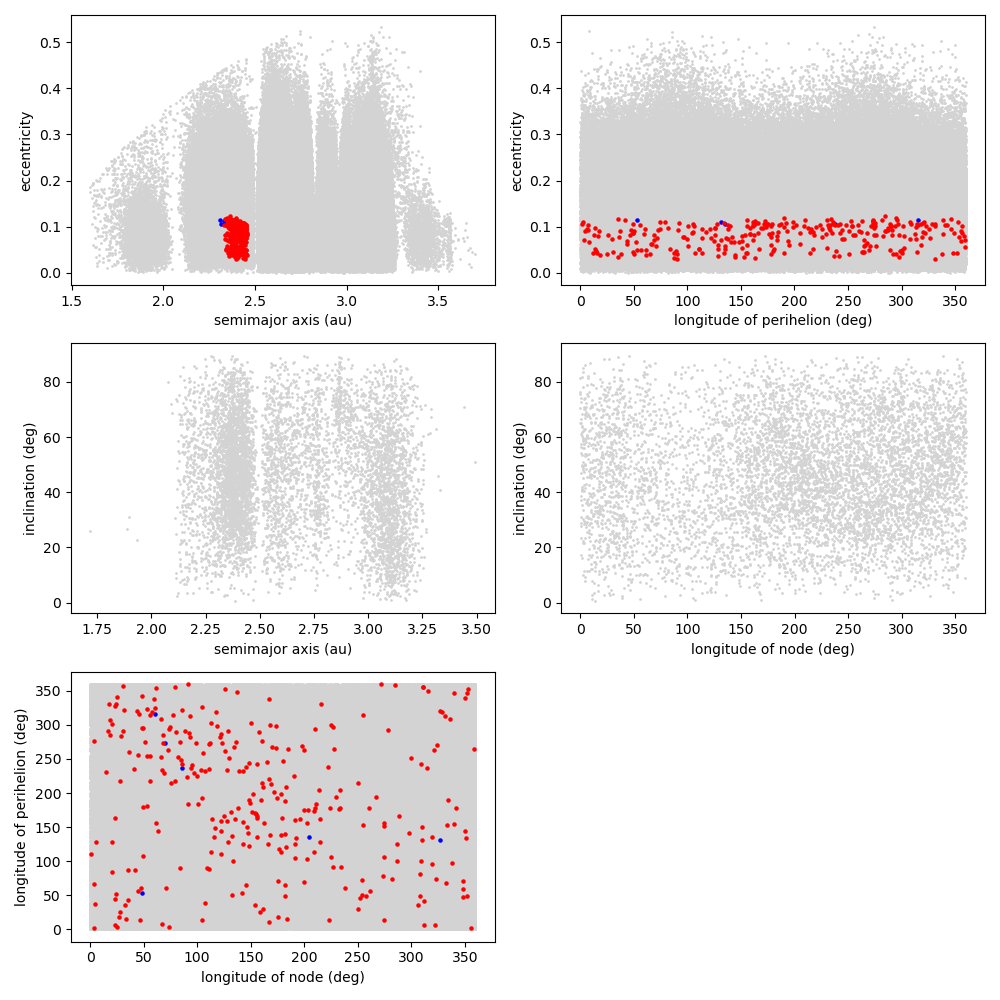

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

threshold_e = 0.01
threshold_i = 0.01
filter = (
	(merged_df["a"] < 2.5) & (merged_df["a"] > 2.3) &
	(merged_df["e"] < target["e"] + threshold_e) & (merged_df["e"] > target["e"] - threshold_e) &
	(merged_df["Incl."] < target["Incl."] + threshold_i) & (merged_df["Incl."] > target["Incl."] - threshold_i)
)

filtered = merged_df[filter].copy()
filtered["Incl_deg"] = np.degrees(np.arcsin(filtered["Incl."]))
family_df["Incl_deg"] = np.degrees(np.arcsin(family_df["Incl."]))

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flatten()

axs[0].scatter(merged_df["a"], merged_df["e"], color="lightgray", s=1)
axs[0].scatter(filtered["a"], filtered["e"], color="blue", s=5)
axs[0].scatter(family_df["a"], family_df["e"], color="red", s=5)
axs[0].set_xlabel("semimajor axis (au)")
axs[0].set_ylabel("eccentricity")

axs[1].scatter(merged_df["Peri."], merged_df["e"], color="lightgray", s=1)
axs[1].scatter(filtered["Peri."], filtered["e"], color="blue", s=5)
axs[1].scatter(family_df["Peri."], family_df["e"], color="red", s=5)
axs[1].set_xlabel("longitude of perihelion (deg)")
axs[1].set_ylabel("eccentricity")

axs[2].scatter(merged_df["a"], np.degrees(np.arcsin(merged_df["Incl."])), color="lightgray", s=1)
axs[2].scatter(filtered["a"], filtered["Incl_deg"], color="blue", s=5)
axs[2].scatter(family_df["a"], family_df["Incl_deg"], color="red", s=5)
axs[2].set_xlabel("semimajor axis (au)")
axs[2].set_ylabel("inclination (deg)")

axs[3].scatter(merged_df["Node"], np.degrees(np.arcsin(merged_df["Incl."])), color="lightgray", s=1)
axs[3].scatter(filtered["Node"], filtered["Incl_deg"], color="blue", s=5)
axs[3].scatter(family_df["Node"], family_df["Incl_deg"], color="red", s=5)
axs[3].set_xlabel("longitude of node (deg)")
axs[3].set_ylabel("inclination (deg)")

axs[4].scatter(merged_df["Node"], merged_df["Peri."], color="lightgray", s=1)
axs[4].scatter(filtered["Node"], filtered["Peri."], color="blue", s=5)
axs[4].scatter(family_df["Node"], family_df["Peri."], color="red", s=5)
axs[4].set_xlabel("longitude of node (deg)")
axs[4].set_ylabel("longitude of perihelion (deg)")

axs[5].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
target = merged_df[merged_df["Des'n"] == des].iloc[0]
target

Unnamed: 0.1          134
Unnamed: 0            134
Des'n                 135
H_x                  8.39
G                    0.15
Epoch               K239D
M                34.51442
Peri.           340.44092
Node            343.55574
Incl.             2.30318
e                0.207201
n                0.260403
a                2.428693
propa            2.428506
da               0.000001
prope            0.174326
de               0.000035
propsini         0.046521
dsini            0.000012
g               41.708511
s              -46.712515
H_y                  8.39
NumOpps                72
prope_h          0.174685
propsini_h       0.018515
g0               0.000032
ecospo           0.141317
esinpo          -0.102685
sinicosO          0.00031
sinisinO        -0.000091
s0              -0.000032
Name: 134, dtype: object

In [ ]:
from pathlib import Path
import pandas as pd
import re
df = pd.read_csv("asteroid_families_csv.txt")
dataset_path = Path('family_tables')
filenames = list(dataset_path.glob('*.csv'))
def capitalize_asteroid_name(name):
	if isinstance(name, str):
		first_part = name.split(' ')[0]
		match = re.match(r'^(?P<year>\d{4})(?P<letters>[a-zA-Z]+)(?P<numbers>\d+)$', name)
		if first_part.isdigit() or name.replace('.', '').isdigit():
			return name
		if match:
			year = match.group('year')
			letters = match.group('letters').upper() # Capitalize all letters
			numbers = match.group('numbers')
			return f"{year} {letters}{numbers}"
		else:
			return name.title()
	return name

# Apply the function to the 'Name' column

for filename in filenames:
	family_name = str(filename).split("/")[-1].split(".")[0].split("_")[-2]
	family_name = capitalize_asteroid_name(family_name)
	print(family_name)

Goodhue
Sitterly
Tugela
Eugenia
Shukla
2008 OV23
Chleborad
2005 WV105
2001 PG20
2007 DM10
1994 AO1
Algoa
2001 TS117
Feodosia
Burnett
L
Europa
Avsyuk
2002 FX3
1999 RX33
Tantawi
Velleda
Kira
Interamnia
1999 CG62
2008 BO31
Vanderlaan
Bradshaw
1999 XB232
Innanen
Chesneau
Maca
George
Principia
Chaliapin
Khama
Abastumani
2000 UJ87
1990 OE5
1999 XU240
Bellona
1999 AE7
Aeternitas
2002 OS10
Hawke
Joensuu
Florentina
2001 SV124
Liriope
1995 FH2
Wratislavia
1990 QZ5
Kodaihasu
Bezovec
Tomhamilton
Ulrike
Schlichting
2000 BV3
Tuchkova
1998 GC3
Andytran
2006 KU114
Jacchia
Istria
2001 OH105
2010 WK8
Nipponia
Coelestina
Takehiro
Wilhelmina
Katsurahama
Vandenbos
Iclea
2002 CS52
2012 PM61
Yrsa
Kawakita
Michelangelo
Pamina
Akusekijima
Tercidina
Iitatemura
Siegena
1998 TA6
Ornamenta
2000 FO47
1999 CQ75
Prokne
Thyra
Mcdonalda
Altona
Harmonia
1998 YB3
2008 YL101
Industria
Graculus
Alamosa
Cindygraber
1998 WW16
1996 WU2
Alvema
Vanadis
1998 HD130
2001 FP147
2002 TE180
Patria
1999 NR38
Zelima
2001 SQ46
Vassar
He

In [ ]:
dataset_path = Path('family_tables')
filenames = list(dataset_path.glob('*.csv'))
column_names = ['propa', 'prope', 'propsini', 'g', 's', 'H', 'NumOpps', 'PackedName', 'UnpackedName']
for filename in filenames[:1]:
	df_family = pd.read_csv(str(filename), header = None, names = column_names)
	print(df_family.head())

      propa     prope  propsini           g           s      H  NumOpps  \
0  3.101140  0.159889  0.020494  115.537083 -100.860548  13.19       25   
1  3.102481  0.159807  0.020326  116.064848 -101.029759  14.29       24   
2  3.102270  0.159778  0.020301  115.998575 -100.983441  16.93       11   
3  3.100848  0.160344  0.020692  115.448488 -100.937763  17.20        4   
4  3.103373  0.159590  0.020158  116.456489 -101.082067  17.32        5   

  PackedName UnpackedName  
0      12911        12911  
1      18670        18670  
2      q3500       523500  
3    K05EY6L    2005EL346  
4    K12TX2S    2012TS332  


In [ ]:
def Gaussian_fit_model(id, targetid, wavelength, flux, ivar, redshift, RA, DEC):
	fx = np.array(flux)
	wv = np.array(wavelength)
	LAMOST_vr = df_targets.loc[df_targets['TARGETID']== targetid]['VRAD'].values[0]
	a = np.sqrt(np.array(ivar))
	errr = np.empty(0)
	for i in range(len(a)):
		if a[i] == 0: 
			error = 0
		else:
			error = 1/a[i]
		errr = np.append(errr, error)

	#find the signal-to-noise
	SN = np.empty(0)
	for i in range(len(a)):
		if a[i]!=0:
			sn = fx[i] * a[i]
	SN = np.append(SN, sn)
	ratio = np.median(SN)


	# In[72]:

	# ## Step 1: Determine the radial velocity of the star

	# In[73]:


	wv_0_Ha = 6562.8
	c = 299792.458 #unit: km/s

	if cata_vr == 0:
		Min = 6550
		Max = 6575
	else:
		Ha = cata_vr * wv_0_Ha / c + wv_0_Ha
		Min = Ha - 5
		Max = Ha + 5
	within_range = (wv >= Min) & (wv <= Max)
	wv_filtered = wv[within_range]
	fx_filtered = fx[within_range]
	min_fx = np.min(fx_filtered)
	min_indices = np.where((fx_filtered == min_fx) & (fx_filtered != 0))[0]
	wv_min = wv_filtered[min_indices]


	# In[74]:


	#calculate the radial velocity
	def radial_velocity(wv_0, wv): 
		a = c * (wv - wv_0)/wv_0
		return a

	v_r = radial_velocity(wv_0_Ha, wv_min)[0]
	v_r #km/s


	# ## Step 2: Find the wavelength of lithium in the emission

	# In[75]:


	wv_0_Li = 6707.835
	wv_Li = wv_0_Li *(1 + v_r/c)
	wv_Li


	# ## Step 3: Find the line of best fit near lithium line

	# In[76]:


	#filter out the region for linear best fit line
	wv_Li_min = wv_Li - 20
	wv_Li_max = wv_Li + 20
	wv_range = (wv >= wv_Li_min) & (wv <= wv_Li_max)
	wv_filtered = wv[wv_range]
	fx_filtered = fx[wv_range]
	errr_filtered = errr[wv_range]

	#fit with account to the uncertainty
	def linear_model(x, m, c):
		return m * x + c
	popt, pcov = curve_fit(linear_model, wv_filtered, fx_filtered, sigma=errr_filtered, absolute_sigma=True)
	m, c = popt
	line_of_best_fit = m * wv_filtered + c

	#omit the outlier
	residuals = fx_filtered - line_of_best_fit
	residuals_std = np.std(residuals)
	threshold = 3 * residuals_std

	# Filter out points with large residuals
	mask = np.abs(residuals) < threshold
	wv_removed = wv_filtered[mask]
	fx_removed = fx_filtered[mask]
	errr_filtered = errr_filtered[mask]

	popt, pcov = curve_fit(linear_model, wv_removed - np.mean(wv), fx_removed, sigma=errr_filtered, absolute_sigma=True)
	m, c = popt
	line_of_best_fit = m * (wv - np.mean(wv)) + c


	# ## Step 4: Reduce the spectra with respect to the line of best fit

	# In[77]:


	fx_normalized_filtered = (fx/line_of_best_fit)[wv_range]
	errr_normalized_filtered = (errr/line_of_best_fit)[wv_range]

	# ## Step 5: Fit the Gaussian model to this region

	# In[78]:


	@custom_model
	def sum_of_gaussians(x, amplitude=1., mean=-1., sigma=1.):
		return (amplitude * np.exp(-0.5 * ((x - mean) / sigma)**2) + 1)


	# In[79]:


	sigma_Li = wv_Li/7500/2.3548
	m_init = sum_of_gaussians(amplitude=-0.05,mean=wv_Li,sigma=sigma_Li)

	#constraints
	m_init.amplitude.fixed = False
	m_init.mean.fixed = True
	m_init.sigma.fixed = True
	m_init.amplitude.min = -1
	m_init.amplitude.max = 0

	#fitting
	fit = LevMarLSQFitter()
	fx_final = fx_normalized_filtered/np.median(fx_normalized_filtered)
	errr_final = errr_normalized_filtered/np.median(fx_normalized_filtered)
	wv_filtered = wv[wv_range]
	m = fit(m_init, wv_filtered, fx_final, maxiter=500, weights = 1/errr_final)

	# # Invert the flux to find valleys (absorption lines)
	# inverted_flux = 1.0 - fx_normalized_filtered
	
	# # Find minima (i.e., local absorption lines)
	# peaks, properties = find_peaks(inverted_flux, height=0.005, distance=3)  # tune as needed
	
	# # Get the corresponding wavelengths of detected lines
	# absorption_lines = wv_filtered[peaks]
	# depths = inverted_flux[peaks]
	
	# # Optional: Print or store these
	# print("Detected absorption features near Li:")
	# for lam, depth in zip(absorption_lines, depths):
	# 	print(f"{lam/(1+v_r/299792.458):.3f} Å (depth ~ {depth:.3f})")

	#uncertainty in the LevMarLSQFitter 
	cov = fit.fit_info['param_cov']
	error = cov**0.5

	#calculate the equivalent width
	W = m.amplitude.value * m.sigma.value * (2 * np.pi)**(0.5)
	W_error = -error[0][0]/m.amplitude.value * W

	#calculate the chi2 of the fit
	y_pred = m(wv_filtered)
	y_actual = fx_final
	y_error = errr_final
	chi2 = np.sum(((y_actual - y_pred) / y_error)** 2)
	dof = len(wv_filtered)-1
	reduced_chi2 = chi2/dof

	# #signal-to-noise = 
	# fig = figure(figsize=(10, 6))
	# plt.plot(wv_filtered, fx_final, lw=4)
	# plt.plot(wv, m(wv), color='r', lw=4)
	# # plt.xticks(np.arange(wv_Li_min - 20, wv_Li_max + 20, step=10), fontsize=15)
	# plt.yticks(np.arange(0, 1.20, step=0.1), fontsize=15)
	# plt.xlim(wv_Li_min, wv_Li_max + 20)
	# plt.ylim(np.min(fx_normalized_filtered) - 0.1, np.max(fx_normalized_filtered) + 0.1)
	# plt.xlabel('wavelength ($\AA$)', size=13)
	# plt.ylabel('normalized flux', size=13)
	# plt.vlines(x=wv_Li, ymax=1.10, ymin=0.7, color="purple")
	# plt.show()
	#return star name, observation id, equivalent width, the uncertainty of it in a list, and the chi2 of the fit
	return [id, targetid, v_r, W, W_error, reduced_chi2, ratio, redshift, RA, DEC]